In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# predict Not Fully Paid
df = pd.read_csv('loan_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


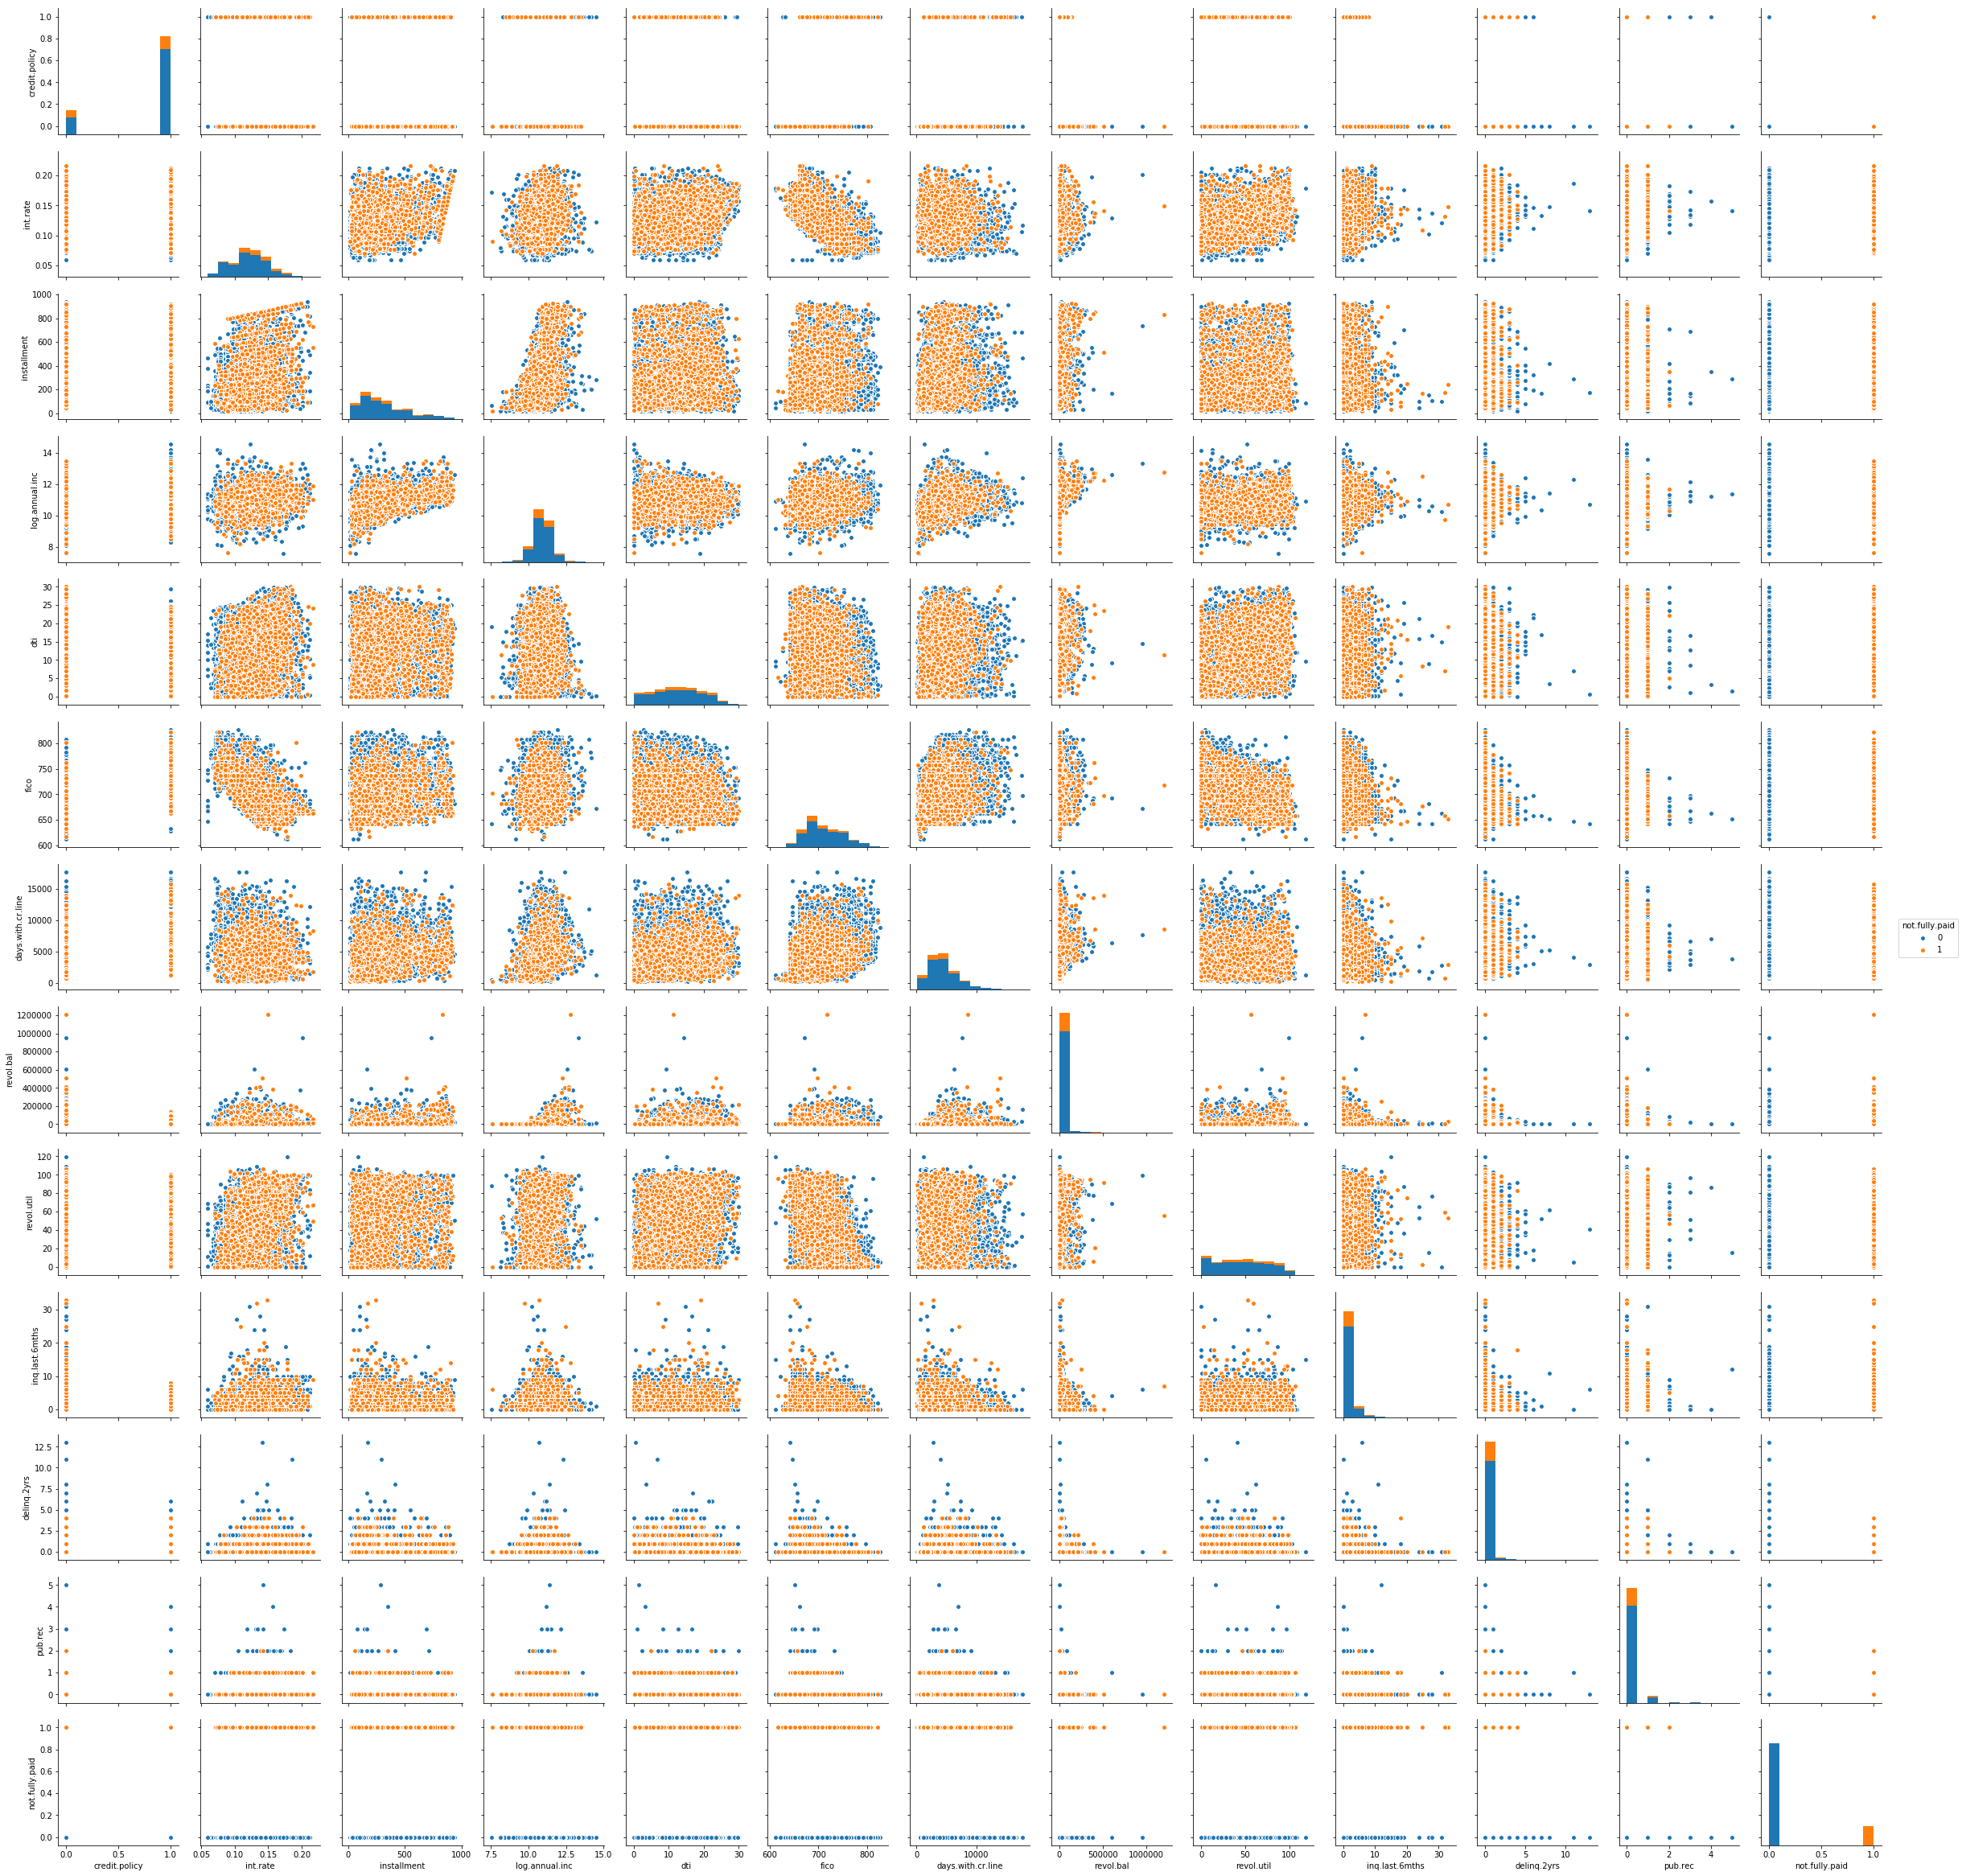

In [7]:
sns.pairplot(df, hue = 'not.fully.paid')

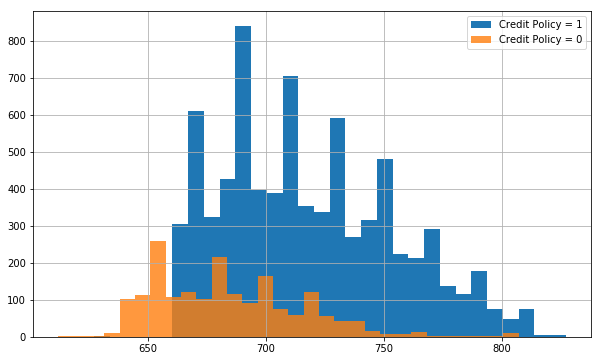

In [24]:
plt.figure(figsize=(10,6))
df[df['credit.policy'] == 1]['fico'].hist(
    bins = 30,
    label = 'Credit Policy = 1')
df[df['credit.policy'] == 0]['fico'].hist(
    bins = 30, alpha = .8,
    label = 'Credit Policy = 0')

plt.legend()

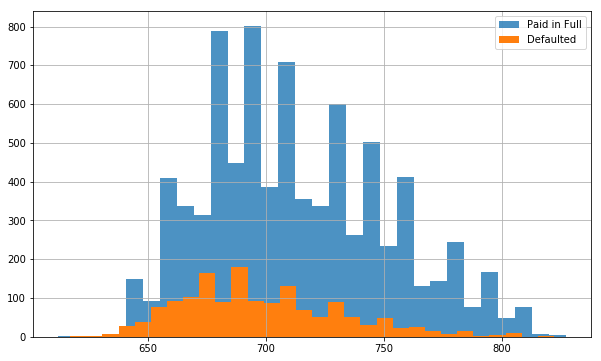

In [26]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid'] == 0]['fico'].hist(
    bins = 30, alpha = .8,
    label = 'Paid in Full')

df[df['not.fully.paid'] == 1]['fico'].hist(
    bins = 30,
    label = 'Defaulted')

plt.legend()

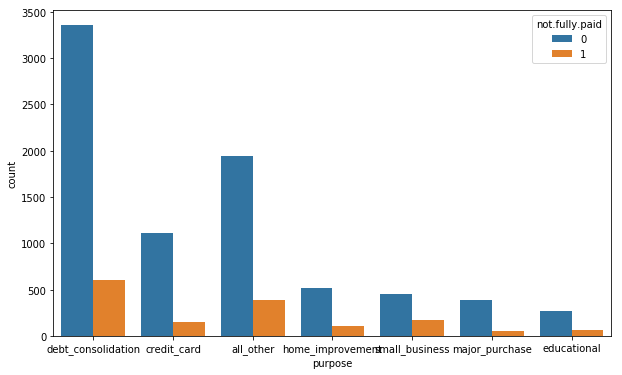

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = df)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


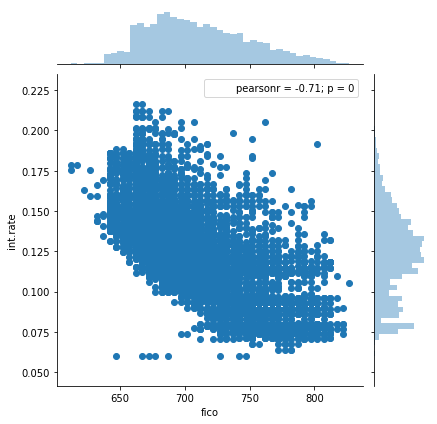

In [29]:
sns.jointplot(x = 'fico', y = 'int.rate', data = df)

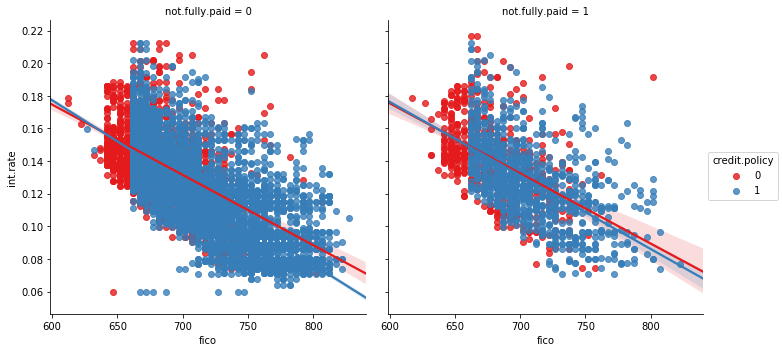

In [6]:
sns.lmplot('fico','int.rate',df,'credit.policy','not.fully.paid', palette = 'Set1')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
cat_feats = ['purpose']

In [14]:
final_data = pd.get_dummies(df, columns = cat_feats, drop_first = True)

In [40]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [11]:
from sklearn.model_selection import train_test_split

In [15]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree = DecisionTreeClassifier()

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
preds = dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print('Confusion Matrix')
print(confusion_matrix(y_test,preds))
print('\n')
print('Classification Report')
print(classification_report(y_test,preds))

Confusion Matrix
[[1996  435]
 [ 331  112]]


Classification Report
             precision    recall  f1-score   support

          0       0.86      0.82      0.84      2431
          1       0.20      0.25      0.23       443

avg / total       0.76      0.73      0.74      2874



In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rdf = RandomForestClassifier(n_estimators=300)

In [20]:
rdf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rdf_preds = rdf.predict(X_test)

In [27]:
print('RDF Confusion Matrix:')
print(confusion_matrix(y_test,rdf_preds))
print('\n')
print('DTree Confusion Matrix:')
print(confusion_matrix(y_test,preds))

print('\n')
print('RDF Classification Report:')
print(classification_report(y_test,rdf_preds))
print('\n')
print('DTree Classification Report')
print(classification_report(y_test,preds))

RDF Confusion Matrix:
[[2423    8]
 [ 433   10]]


DTree Confusion Matrix:
[[2006  425]
 [ 338  105]]


RDF Classification Report:
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.56      0.02      0.04       443

avg / total       0.80      0.85      0.78      2874



DTree Classification Report
             precision    recall  f1-score   support

          0       0.86      0.83      0.84      2431
          1       0.20      0.24      0.22       443

avg / total       0.75      0.73      0.74      2874



In [57]:
# RDF had better precision, recall, and f1 score.
# Not a huge difference between the two
# How can we make this better?